<a href="https://colab.research.google.com/github/usama475/computational_physics/blob/main/Copy_of_ML_Project_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.8.0 seaborn==0.13.2 streamlit==1.40.2 plotly==5.24.1 Pillow==11.0.0 scikit-learn==1.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled num

Visualized Patient Report


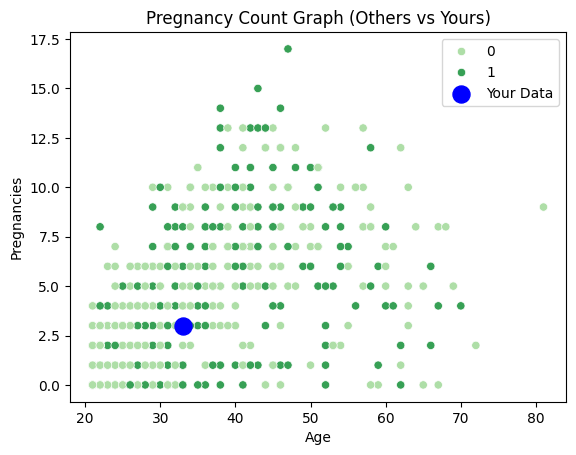

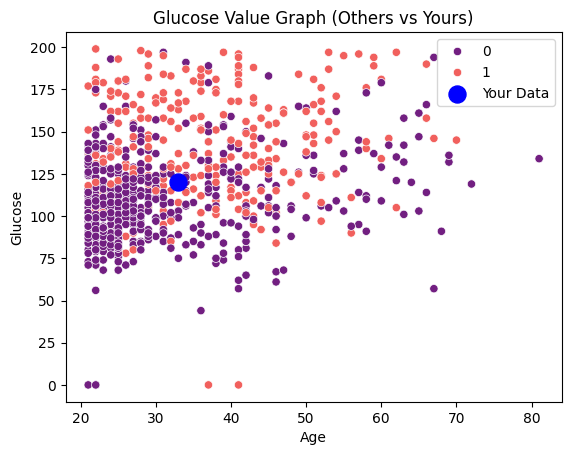

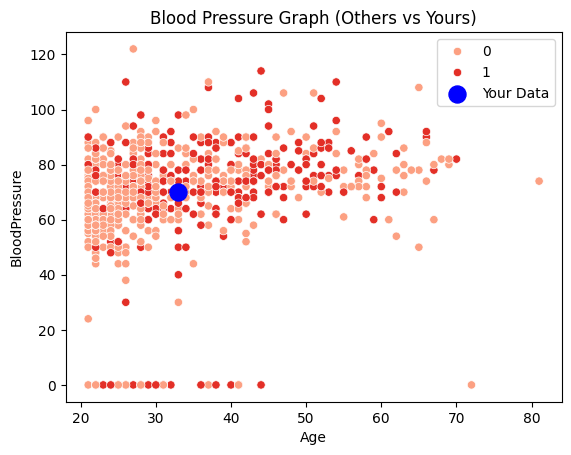

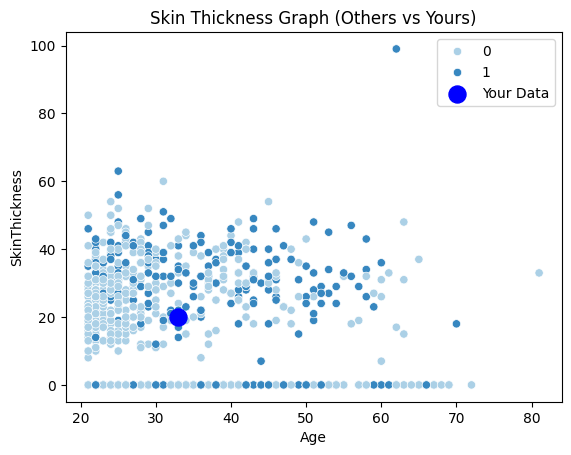

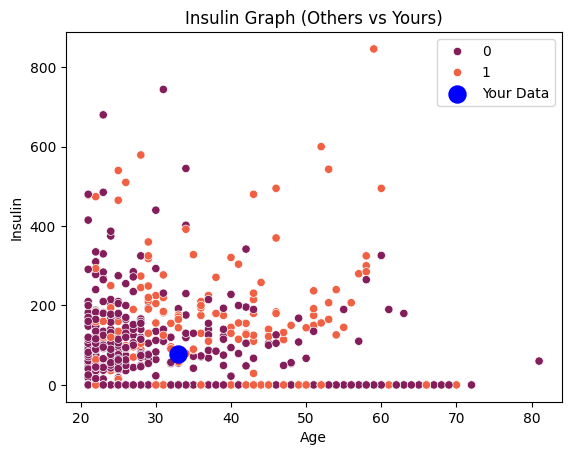

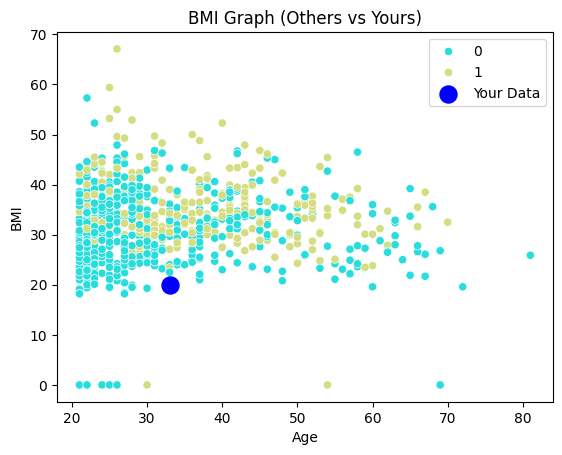

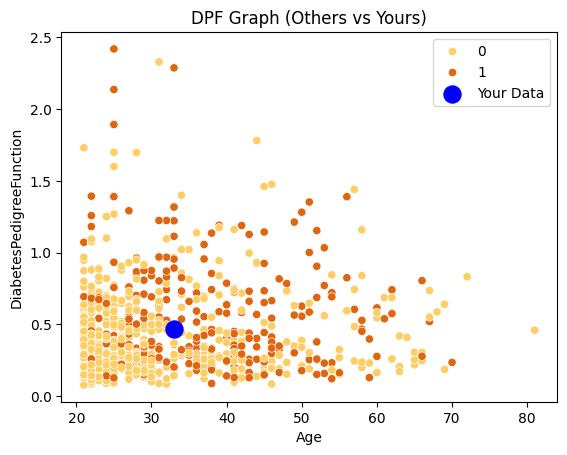

Your Report: You are not Diabetic
Model Accuracy: 78.57%


In [ ]:
# IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LOAD DATA
url = "https://raw.githubusercontent.com/fenago/datasets/main/pima-indians-diabetes2.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)

# SPLITTING X AND Y DATA
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Function to simulate user input (since Google Colab can't have sidebar sliders)
# Using example user data
user_data = {
    'Pregnancies': 3,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 20,
    'Insulin': 79,
    'BMI': 20.0,
    'DiabetesPedigreeFunction': 0.47,
    'Age': 33,
}

user_report_data = pd.DataFrame(user_data, index=[0])

# MODEL
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
user_result = rf.predict(user_report_data)

# Visualizations
print("Visualized Patient Report")

# COLOR FUNCTION
color = 'blue' if user_result[0] == 0 else 'red'

# Helper function for scatter plots
def create_scatter_plot(x_col, y_col, user_val_x, user_val_y, palette, title):
    fig = plt.figure()
    sns.scatterplot(x=x_col, y=y_col, data=df, hue='Outcome', palette=palette)
    plt.scatter(user_val_x, user_val_y, s=150, color=color, label='Your Data')
    plt.title(title)
    plt.legend()
    plt.show()

# Graphs
create_scatter_plot('Age', 'Pregnancies', user_report_data['Age'][0], user_report_data['Pregnancies'][0], 'Greens', 'Pregnancy Count Graph (Others vs Yours)')
create_scatter_plot('Age', 'Glucose', user_report_data['Age'][0], user_report_data['Glucose'][0], 'magma', 'Glucose Value Graph (Others vs Yours)')
create_scatter_plot('Age', 'BloodPressure', user_report_data['Age'][0], user_report_data['BloodPressure'][0], 'Reds', 'Blood Pressure Graph (Others vs Yours)')
create_scatter_plot('Age', 'SkinThickness', user_report_data['Age'][0], user_report_data['SkinThickness'][0], 'Blues', 'Skin Thickness Graph (Others vs Yours)')
create_scatter_plot('Age', 'Insulin', user_report_data['Age'][0], user_report_data['Insulin'][0], 'rocket', 'Insulin Graph (Others vs Yours)')
create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (Others vs Yours)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (Others vs Yours)')

# OUTPUT
output = 'You are not Diabetic' if user_result[0] == 0 else 'You are Diabetic'
print(f"Your Report: {output}")

# Model accuracy
accuracy = accuracy_score(y_test, rf.predict(x_test)) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


In [ ]:
!pip install pyngrok


In [ ]:
streamlit_script = '''
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/diabetes.csv")

# Streamlit title and display data
st.title('Diabetes Checkup')
st.sidebar.header('Patient Data')
st.subheader('Training Data Stats')
st.write(df.describe())

# Splitting features and target
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Function to get user input
def user_report():
    pregnancies = st.sidebar.slider('Pregnancies', 0, 17, 3)
    glucose = st.sidebar.slider('Glucose', 0, 200, 120)
    bp = st.sidebar.slider('Blood Pressure', 0, 122, 70)
    skinthickness = st.sidebar.slider('Skin Thickness', 0, 100, 20)
    insulin = st.sidebar.slider('Insulin', 0, 846, 79)
    bmi = st.sidebar.slider('BMI', 0.0, 67.0, 20.0)
    dpf = st.sidebar.slider('Diabetes Pedigree Function', 0.0, 2.4, 0.47)
    age = st.sidebar.slider('Age', 21, 88, 33)

    user_report_data = {
        'Pregnancies': pregnancies,
        'Glucose': glucose,
        'BloodPressure': bp,
        'SkinThickness': skinthickness,
        'Insulin': insulin,
        'BMI': bmi,
        'DiabetesPedigreeFunction': dpf,
        'Age': age,
    }
    report_data = pd.DataFrame(user_report_data, index=[0])
    return report_data

# Get user input
user_data = user_report()
st.subheader('Patient Data')
st.write(user_data)

# Model training
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
user_result = rf.predict(user_data)

# Visualization: Age vs. Pregnancies
def create_scatter_plot(x_col, y_col, user_val_x, user_val_y, palette, title):
    fig = plt.figure()
    sns.scatterplot(x=x_col, y=y_col, data=df, hue='Outcome', palette=palette)
    plt.scatter(user_val_x, user_val_y, s=150, color='red' if user_result[0] == 1 else 'blue', label='Your Data')
    plt.title(title)
    plt.legend()
    st.pyplot(fig)

create_scatter_plot('Age', 'Pregnancies', user_data['Age'][0], user_data['Pregnancies'][0], 'Greens', 'Pregnancy Count Graph (Others vs Yours)')
create_scatter_plot('Age', 'Glucose', user_data['Age'][0], user_data['Glucose'][0], 'magma', 'Glucose Value Graph (Others vs Yours)')
create_scatter_plot('Age', 'BloodPressure', user_data['Age'][0], user_data['BloodPressure'][0], 'Reds', 'Blood Pressure Graph (Others vs Yours)')
create_scatter_plot('Age', 'SkinThickness', user_data['Age'][0], user_data['SkinThickness'][0], 'Blues', 'Skin Thickness Graph (Others vs Yours)')
create_scatter_plot('Age', 'Insulin', user_data['Age'][0], user_data['Insulin'][0], 'rocket', 'Insulin Graph (Others vs Yours)')
create_scatter_plot('Age', 'BMI', user_data['Age'][0], user_data['BMI'][0], 'rainbow', 'BMI Graph (Others vs Yours)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_data['Age'][0], user_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (Others vs Yours)')

# Output
st.subheader('Your Report:')
output = 'You are not Diabetic' if user_result[0] == 0 else 'You are Diabetic'
st.title(output)
'''

with open('/content/diabetes_app.py', 'w') as f:
    f.write(streamlit_script)


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token('2oL1qcTZaxH9Mv5XqzFLjS4DTkA_7jgKN5Upm6G6p3pNsqEA1')


In [ ]:
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://f0c9-35-203-167-29.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!nohup streamlit run /content/diabetes_app.py

nohup: ignoring input and appending output to 'nohup.out'
